In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from scipy.signal import butter, filtfilt


In [8]:
df = pd.read_csv('/home/edumaba/Public/MPhil_Thesis/Activity Classification/BPK409-Lab1-DAQ/ExampleData/Lab1Qu5_6.txt', sep='\t', header=None, names=['x', 'y', 'z', 't'])

In [9]:
df.head

<bound method NDFrame.head of           x      y      z      t
0    -0.076 -0.007  1.006   1038
1    -0.073  0.012  1.001   1169
2    -0.077  0.013  0.998   1193
3    -0.079  0.007  1.003   1218
4    -0.075  0.007  0.995   1240
...     ...    ...    ...    ...
2729 -0.780  0.507  0.487  70218
2730 -0.744  0.466  0.463  70244
2731 -0.680  0.506  0.344  70270
2732 -0.764  0.428  0.353  70295
2733 -0.729  0.521  0.460  70319

[2734 rows x 4 columns]>

Plot the signal using the individual x,y,and z axes against time (t).

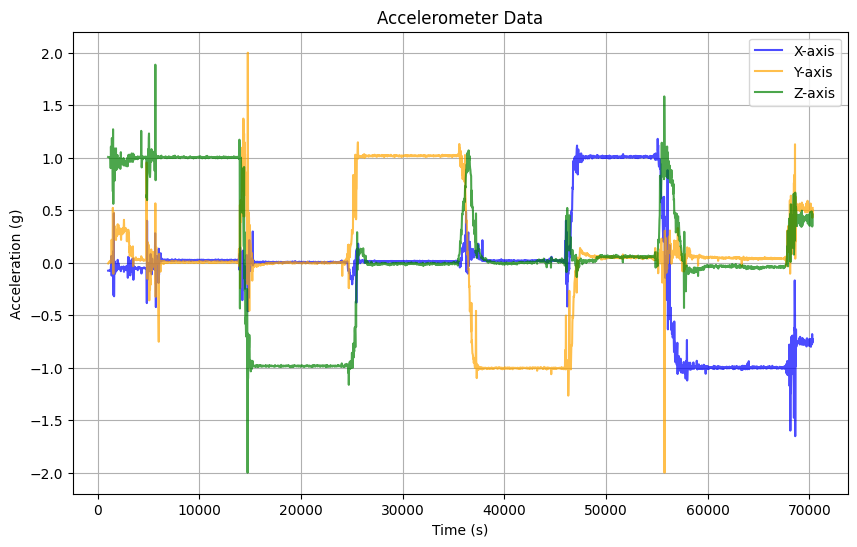

In [10]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['t'], df['x'], label='X-axis', color='b', alpha=0.7)
plt.plot(df['t'], df['y'], label='Y-axis', color='orange', alpha=0.7)
plt.plot(df['t'], df['z'], label='Z-axis', color='g', alpha=0.7)
plt.title('Accelerometer Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid()
plt.show()

#### Preprocessing

- Combine axes into one unfiltered signal.
- Filter the signal with a 4th order Butterworth signal
- Plot both signals

In [11]:
unfiltered_signal = df[['x', 'y', 'z']].values

# print(unfiltered_signal.shape)
# print(np.ravel(unfiltered_signal).shape)

In [12]:
b, a = butter(4, 0.05, btype='low')
# filtered_signal = filtfilt(b, a, np.ravel(unfiltered_signal))
filtered_signal = filtfilt(b, a, unfiltered_signal, axis=0)
print(filtered_signal.shape)

(2734, 3)


Plot the signals.

The code format prevents the legend from showing for all the 6 axes of both signals

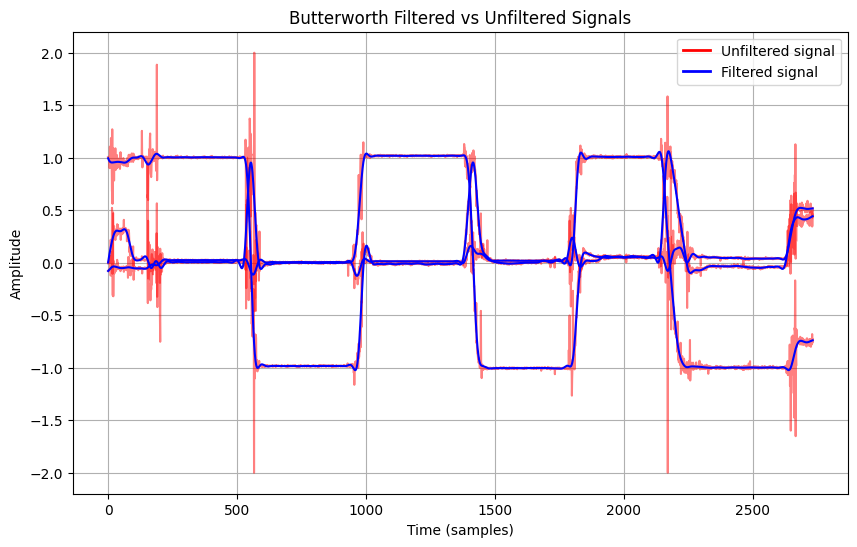

In [13]:
plt.figure(figsize=(10, 6)) 
for i in range(3):
    plt.plot(unfiltered_signal[:, i], color='red', alpha=0.5)
for i in range(3):
    plt.plot(filtered_signal[:, i], color='blue')
    
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Unfiltered signal'),
    Line2D([0], [0], color='blue', lw=2, label='Filtered signal')
]
plt.legend(handles=legend_elements)
plt.title("Butterworth Filtered vs Unfiltered Signals")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()